# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 9

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 40 баллов


<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 2 &mdash; 20 баллов
* Задача 3 &mdash; 35 баллов




-----

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps


import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


import warnings
warnings.filterwarnings("ignore")

### <font color="blue">Легкая часть</font>
## Задача 1


### 1. Загрузка данных и предобработка
#### **Профиль биология**

Загрузите [данные](https://www.kaggle.com/datasets/marshuu/breast-cancer) по предсказанию рака груди.

   

In [2]:
#data = pd.read_csv("")
#data.head()

Проверьте, имеются ли в ваших данных пропуски. Если да, то удалите их.


In [3]:
#data.isna()

Библиотека `pandas` позволяет строить графики `matplotlib` для своих объектов `DataFrame` ([подробнее](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)). Посмотрим, как распределены значения признака `Bare Nuclei` для разных классов:

In [4]:
'''
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
data.groupby("Class")['Bare Nuclei'].hist(ax=axs[0], )
data.groupby("Class")['Bare Nuclei'].plot(kind='kde', ax=axs[1])
axs[0].set_title('Гистограмма для Bare Nuclei', fontsize=20)
axs[1].set_title('KDE для Bare Nuclei', fontsize=20);

'''

'\nfig, axs = plt.subplots(1, 2, figsize=(15, 7))\ndata.groupby("Class")[\'Bare Nuclei\'].hist(ax=axs[0], )\ndata.groupby("Class")[\'Bare Nuclei\'].plot(kind=\'kde\', ax=axs[1])\naxs[0].set_title(\'Гистограмма для Bare Nuclei\', fontsize=20)\naxs[1].set_title(\'KDE для Bare Nuclei\', fontsize=20);\n\n'

Постройте гистограммы и ядерные оценки плотности для всех признаков из датасета отдельно для каждого класса.


Какие выводы вы можете сделать из полученный графиков?

**Вывод:** <...>

#### **Профиль физика**
Загрузите [данные](https://www.kaggle.com/datasets/sakhawat18/asteroid-dataset/code) по бинарной классификации астероидов в зависимости от различных параметров. 

Вашей целевой переменной будет являться столбец `pha`. Более подробно ознакомить с датасетом вы можете также [здесь](https://www.kaggle.com/datasets/sakhawat18/asteroid-dataset/code)

In [5]:
data = pd.read_csv("dataset.csv")
data.head()

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


Удалим ненужные колонки и колонки с категориальными данными, потому что мы пока не умеем с ними работать. 

In [6]:
data = data.drop(['id', 'spkid', 'full_name', 'pdes',
                  'name', 'prefix', 'neo', 'orbit_id', 
                  'equinox', 'class'], axis=1)

# переведем таргет в столбец 0 и 1
data['pha'] = LabelEncoder().fit_transform(data['pha'])

Проверьте, есть ли среди ваших данных пропуски. Если да, то удалите их.

In [7]:
# чтобы не удалять лишнего, сразу выберем только интересующие нас столбцы
features = ['e', 'ma', 'n', 'tp', 'rms']
data = data.loc[:, features + ['pha', 'H', 'epoch']]

print("В таблице ", len(data), " строк.")
print("Из них ", len(data) - len(data.dropna()), " пропусков. Удаляем строки с ними!")
data = data.dropna()

В таблице  958524  строк.
Из них  6266  пропусков. Удаляем строки с ними!


Немало, конечно, но все равно достаточное количество еще осталось. 
Возможно, был какой-то вариант поумнее для работы с пропусками, чем просто их дропать, ну да ладно, пока не паримся.
(было, пока мы удаляли пропуски до выбора столбцов).

стало:

так, стало ощутимо лучше, отлично. возможно, NaN просто тоже считалось пропуском

In [8]:
print(len(data))
data.head()

952258


,e,ma,n,tp,rms,pha,H,epoch
0,0.076009,77.372098,0.213885,2.458239e+06,0.43301,0,3.40,2458600.5
1,0.229972,144.975675,0.213345,2.458321e+06,0.35936,0,4.20,2459000.5
2,0.256936,125.435355,0.226129,2.458446e+06,0.33848,0,5.33,2459000.5
3,0.088721,95.861938,0.271609,2.458248e+06,0.39980,0,3.00,2458600.5
4,0.190913,17.846343,0.238661,2.458926e+06,0.52191,0,6.90,2459000.5


Библиотека `pandas` позволяет строить графики `matplotlib` для своих объектов `DataFrame` ([подробнее](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)). Посмотрим, как распределены значения признака `H` для разных классов:

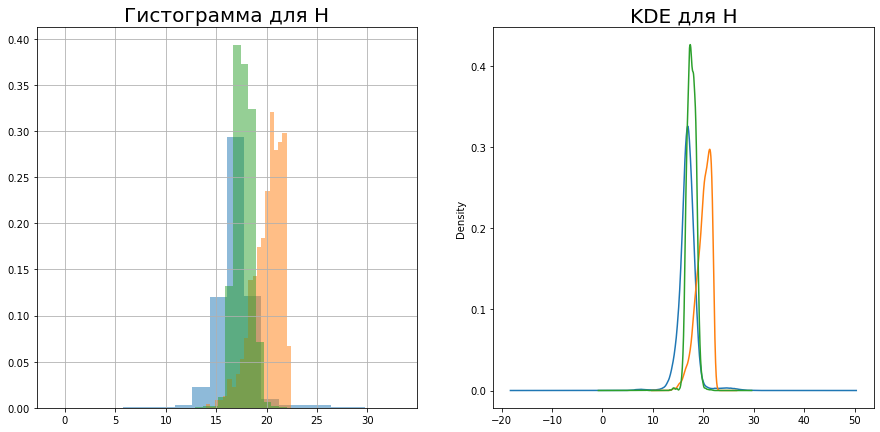

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

data.groupby("pha")['H'].hist(ax=axs[0], alpha=0.5, bins=20, density = True)
data.groupby("pha")['H'].plot(kind='kde', ax=axs[1])
axs[0].set_title('Гистограмма для H', fontsize=20)
axs[1].set_title('KDE для H', fontsize=20);

Какой из графиков качественнее отображает информацию о данных? С чем это связано?

**Ответ:** гистограммка получше, имхо.. слишком столбцов маловато. хотя, kde мб и норм..

Постройте гистограммы и ядерные оценки плотности для признаков из списка features отдельно для каждого класса.

Видим, что признак 'epoch' как-то совсем отвратно строится. Выводим его, чтобы глазами посмотреть. Ну да, это время наблюдения, в чем-то там. оно очень слабо отличается, этот признак отнормировать бы. ну да пох. в общем, примерно одно значение. И уникальных значений тоже очень мало.

In [10]:
print(data['epoch'])
print("Стандартное отклонение: ", np.std(data['epoch'].values))
print("Уникальных значений всего: ", np.shape(np.unique(data['epoch'].values))[0])

0         2458600.5
1         2459000.5
2         2459000.5
3         2458600.5
4         2459000.5
            ...    
958519    2437203.5
958520    2459000.5
958521    2459000.5
958522    2441956.5
958523    2443429.5
Name: epoch, Length: 952258, dtype: float64
Стандартное отклонение:  640.410886688751
Уникальных значений всего:  5194


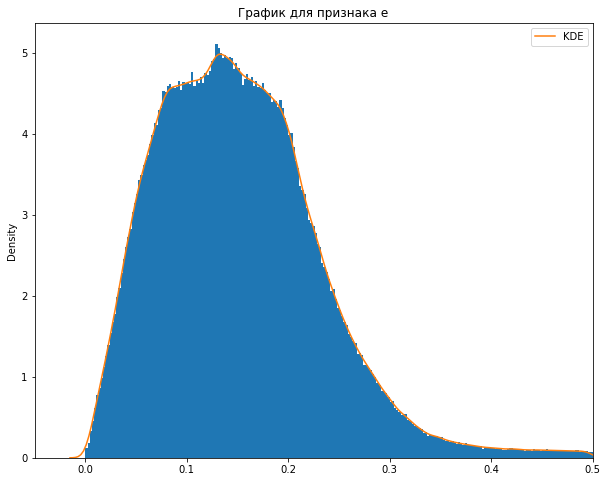

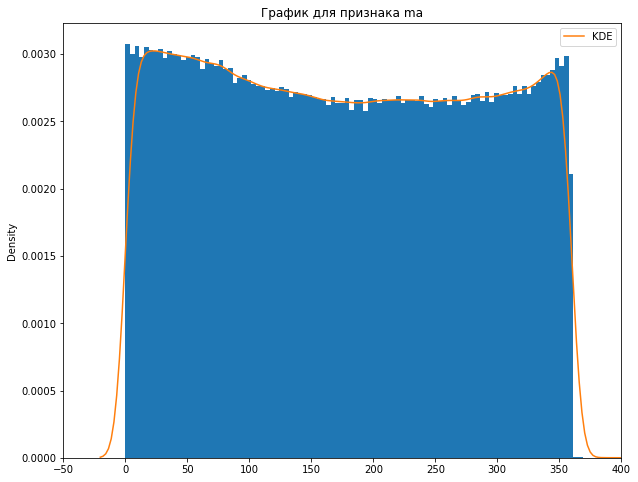

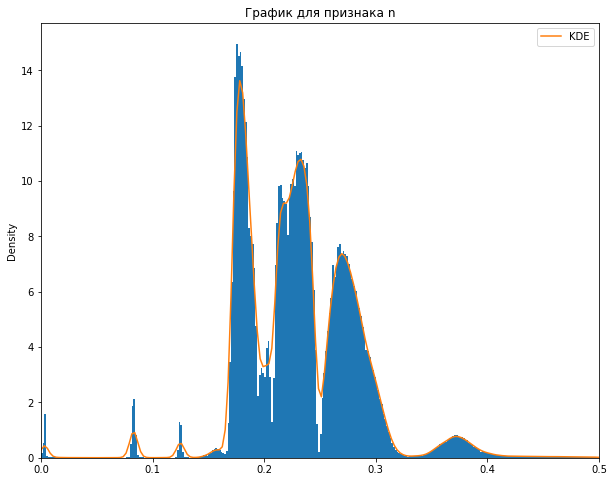

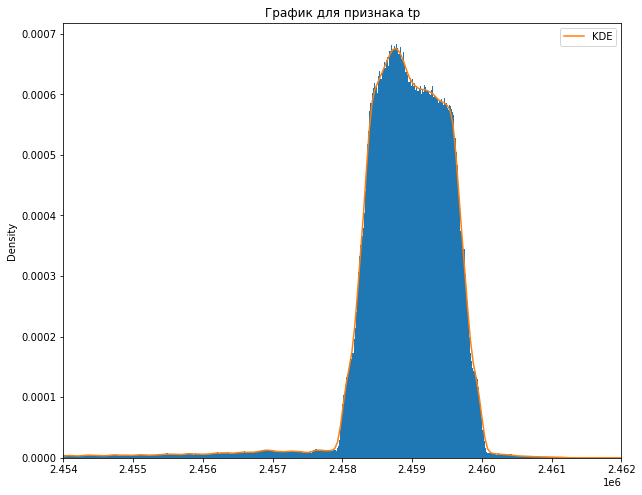

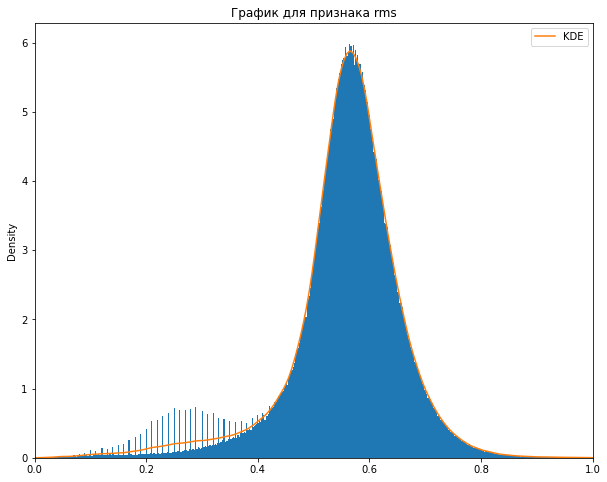

In [11]:
features = ['e', 'ma', 'n', 'tp', 'rms']
# epoch сразу выкидываем, это время, оно у всех столбцов одинаково
#видим, что выбросов много, поэтому зададим границы построения для каждого из признаков

bounds = {'rms': [0,1], 'tp': [2.454e6,2.462e6], "n": [0, 0.5], "ma": [-50, 400], "e": [-0.05, 0.5], "epoch": [2.4588e6, 2.4591e6]}


for feature in features:
    plt.figure(figsize=(10,8))
    vals = data[feature].values
    # откидываем выбросы
    vals = vals[(vals <= bounds[feature][1]) & (vals >= bounds[feature][0])]

    plt.hist(vals, bins = "auto", density=True)
    sns.kdeplot(vals, label="KDE")
    plt.xlim(bounds[feature][0], bounds[feature][1])
    plt.title("График для признака " + feature)
    
    plt.legend()
    plt.show()

ну, отдельно поработаем с epoch, стандартизуем и построим, чтобы не пропускать.

2458892.6136036664


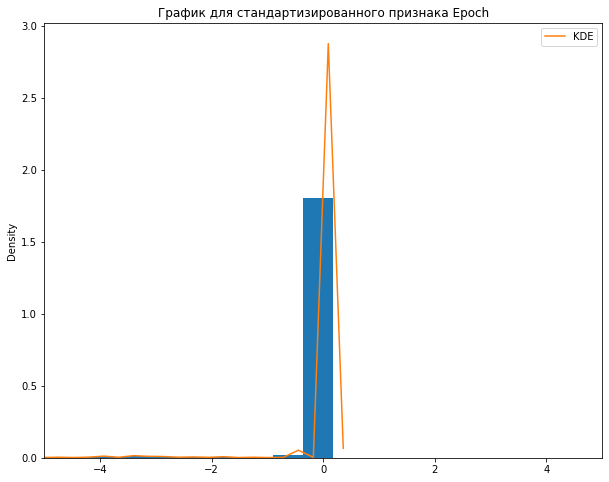

In [12]:
# для разнообразия напишем ручками
epoch_vals = data['epoch'].values
st_epoch_vals = (epoch_vals - np.mean(epoch_vals)) / np.std(epoch_vals)
print(np.mean(epoch_vals))
plt.figure(figsize=(10,8))
plt.hist(st_epoch_vals, bins = 100, density=True)
sns.kdeplot(st_epoch_vals, label="KDE")
plt.xlim((-5,5))
plt.title("График для стандартизированного признака Epoch")
    
plt.legend()
plt.show()

все равно оч всратый график, ну да ладно.

Какие выводы вы можете сделать из полученных графиков?

**Вывод:** Можем посмотреть, где лежит диапазон основной и сразу выбросить лишнее. И сразу выдвинуть гипотезы о виде распределений. ma - можно грубо фитить равномерным. У tp и n несколько ярко-выраженных пиков. rms - колокольчик, похоже на коши или гаусса, нужно проверять. e напоминает гамма-распределение или лог-нормальное распределение.

<h3> Визуализация признаков датасета </h3>

Чтобы хоть как-то визуально понять, а разделяются ли вообще нормально признаки плоскостью, построим распределение точек для каждой пары признаков.

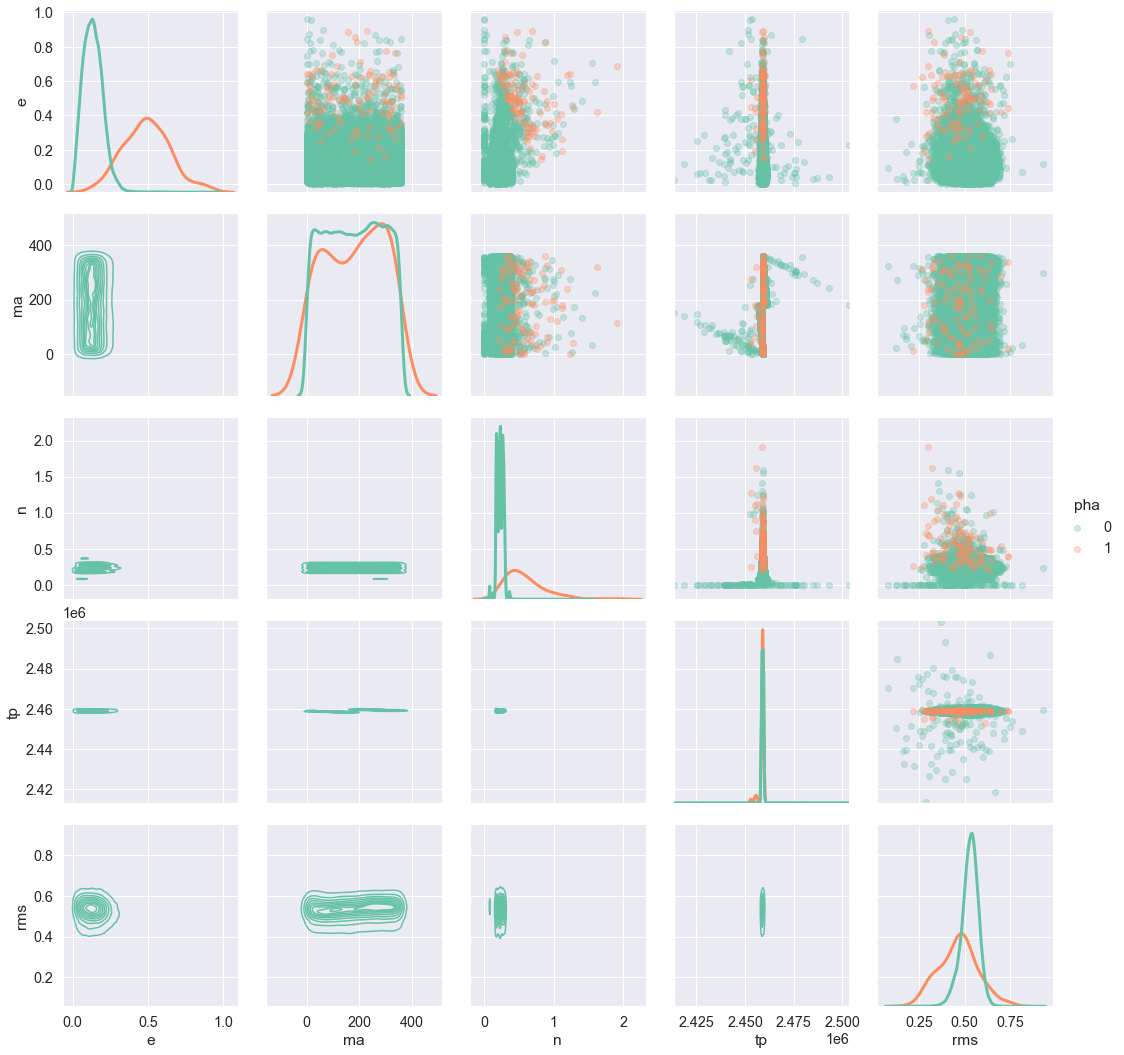

In [21]:
sns.set(font_scale=1.3, palette='Set2')
g = sns.PairGrid(data.loc[0:100000, features + ["pha"]], hue="pha", diag_sharey=False, height=3)

#g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap='Blues_d')
g.map_upper(plt.scatter, alpha=0.3)
g.map_diag(sns.kdeplot, lw=3, common_norm=False, alpha=0.6)

g.add_legend()

### 2. Обучение модели

Продолжайте использовать выбранные вами данные.

Создайте массив признаков и массив таргета. Разбейте ваши данные на обучающую и тестовую выборки в отношении 7:3.

In [23]:
X = data.loc[:, features].values
y = data["pha"].values
# также отмасштабируем игреки. а именно, двойки перегоним в единицы, ну а единицы в 0.5. их мало, так что пох, пусть будут:
y = y / 2

Посмотрим внимательно на структуру целевого признака.

In [24]:
np.unique(y)

array([0. , 0.5, 1. ])

In [25]:
print(len(y[y == 0]))

930273


То есть, всего 3 значения у параметра "у": 0, 1 и 2. Но на единицы подзабьем, ибо их в 10 раз меньше, чем двоек, и в 500 раз меньше, чем нулей. Все равно не хватит, чтобы норм поанализировать. И нужно проверить, сколько нулей, а сколько двоек у нас есть. Для этого можно просто найти среднее.

In [26]:
np.mean(y)

0.022002440515070495

Вывод: нулей сильно больше. плохо! с этим придется работать отдельно. <b> Замечание. </b> А если бы мы выкинули строки с пропусками из таблицы до выбора интересующих нас столбцов, то единиц был бы 0,1%! что намного хуже (еще в 20 раз).

Чтобы не было проблем, выкинем значения 0.5. Все равно мы их нормально не поанализируем, а лог регрессии нужно именно 2 класса. Удобнее всего просто заново выбрать из таблицы с условием.

In [27]:
df = data[data['pha'] != 1]
X = df.loc[:, features].values
y = df["pha"].values
y = y / 2
np.unique(y)

array([0., 1.])

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

Отмасштабируйте свои признаки.

In [29]:
scaler = StandardScaler()
scaler.fit(X_train)
# тренируем только на тестовой, чтобы имитировать реальные условия, когда тест выборка нам неизвестна
X_train_std = scaler.transform(X_train) 
X_test_std = scaler.transform(X_test)

Целевой признак иеет два значения: 0 и 1. Посмотрим для лучшего понимания ситуации на процентное соотношение данных двух значений в выборке

In [30]:
print("Среднее значение целевого признака по тестовой выборке: ", np.mean(y_test))
print("Среднее значение целевого признака по тренировочной выборке: ", np.mean(y_train))

Среднее значение целевого признака по тестовой выборке:  0.021265847652056774
Среднее значение целевого признака по тренировочной выборке:  0.020833395977351933


Ну то есть, единиц сильно меньше, чем нулей. Так что, метрика accuracy будет не сильно показательной, и мы лучше будем брать среднюю абсолютную ошибку (l1-норма разности на l1-норму истинного значения). Это поможет нам узнать, а сколько именно в процентном соотношении единиц мы проебываем

Обучите модель логистической регрессии.

In [31]:
# определяем модель лог регрессии и учим ее
clf = LogisticRegression()
clf.fit(X_train_std, y_train)
print("Коэффициенты модели: ", clf.coef_, clf.intercept_)
np.mean(clf.predict(X_test_std))

Коэффициенты модели:  [[ -0.34679416   0.07069529   0.08361601   0.1189721  -54.22319202]] [-5.68348201]


0.010874979828666446

Уже можно увидеть, что мы реально получаем в 2 раза меньнше единиц, чем нужно. уже такое себе.

<b>Замечание. </b> Как можно увидеть, без стандартизации получается хуита. преекол!!

In [32]:
clf.fit(X_train, y_train)
print("Коэффициенты модели: ", clf.coef_, clf.intercept_)

Коэффициенты модели:  [[-1.02509423e-13 -8.21838780e-11 -1.56338337e-13 -1.56582561e-06
  -1.58206165e-12]] [-6.36671787e-13]


Повторим эксперимент, чтобы проверить воспроизводимость (то есть, сошлось ли). Вывод: да, сошлось.

In [33]:
clf.fit(X_train_std, y_train)
print("Коэффициенты модели: ", clf.coef_, clf.intercept_)

Коэффициенты модели:  [[ -0.34679416   0.07069529   0.08361601   0.1189721  -54.22319202]] [-5.68348201]


Сделайте предсказание для тестовой выборки и оцените качества полученного предсказания.

Начнем с вычисления accuracy-метрики (помня про ее недостатки)

In [34]:
# ну то есть, он просто все единицами кладет..
np.mean(clf.predict(X_test_std))

0.010874979828666446

In [35]:
accuracy_score(y_test,clf.predict(X_test_std))

0.9780746374422048

ага, ну то есть нулей сильно больше, а наш классификатор проебывается примерно в 50% случаев по факту. И метрика accuracy вообще ни о чем не говорит в данном случае. Более того, наш тест как будто бы всегда ошибается, так как сумма примерно 1.

И картиночки с кластерами теперь не построишь, как в задаче с семинара: пространство параметров сильно многомерное. :(

**Вывод:** Невеселая, в общем, статистика: не работает (почти) ничерт. Видимо, это связано с тем, что моделька сильно вырождена, и минимум мы не нашли. На это намекают сильно разные по порядкам значения параметров. Также, у нас есть значения параметров, отличающиеся <b>на порядки</b>, это может свидетельствовать о переобучении модели, и в связи с этим регуляризация может помочь. ок-пон, смотрим следующие задачи про регуляризацию.



### <font color="orange">Сложная часть</font>


## Задача 2

Как можно было увидеть ранее, оценки коэффициентов становятся слишком большими при наличии некоторых проблем с данными. Чтобы этого не происходило, часто выполняют процедуру *регуляризации* в модели. Вы уже сталкивались с этим в линейной регрессиия, однако регуляризацию также успользуют в решениях задач классификации.

Пусть дана выборка $(x_1, Y_1), ..., (x_n, Y_n)$, где $x_i = (x_{i1}, ..., x_{id}) \in \mathscr{X}$ и случайный класс $Y_i \sim Bern\left(\sigma (\theta^T x_i)\right)$. В задаче логистической регрессии максимизируется функция правдоподобия, а точнее - ее логарифм.
$$L_Y (\theta)= \prod\limits_{i=1}^n \sigma (\theta^T x_i)^{Y_i} \left(1 - \sigma (\theta^T x_i)\right)^{1-Y_i}$$

$$\ell_Y(\theta) = \log L_Y(\theta)$$

$$\ell_Y(\theta) \longrightarrow \max_\theta.$$
Регуляризация заключается в искусственном усечении значений вектора оценок коэффициентов путем добавления его нормы к оптимизируемому функционалу. В случае логистической регрессии мы максимизируем функцию правдоподобия, поэтому норма добавляется со знаком минус. Тем самым решается задача
$$\ell_Y(\theta) - \lambda \|\theta\|^2\longrightarrow \max_\theta.$$
где $\lambda > 0$ &mdash; гиперпараметр модели, то есть число, которое задается пользователем. В данном случае мы получили логистическую регрессию **Ridge-регуляризацией**.

*Замечание.* Такая модель дает некоторое *другое приближение* неизвестной зависимости. Но неправильно думать, что она не может дать "правильный" ответ, потому как понятия "правильный ответ" в подобных задачах не существует. Можно получить только *более качественное приближение* согласно выбранной метрике.

**1.** Выпишите формулу поиска оценки коэффициентов методом *градиентного спуска* и *стохастического градиентного спуска* для 
- модели логистической регрессии без регуляризации
- модели логистической регрессии c ridge-регуляризацией

 Не забудьте указать, как математически определяется батч (набор объектов на каждой итерации).

<h3> (нестохастический) Градиентный спуск </h3>

Аналогично лекции, дифференцируем, только теперь нужно учесть (можно по линейности) добавку с лямбдой. Мы получаем для градиента:

$$
    \nabla_{\theta} l_Y (\theta, \lambda) = \sum \limits_{i=1}^{n} (y_i - \sigma (\theta^T x_i ) ) x_i - 2 \lambda \theta, 
$$

и тогда формула градиентного подъема принимает вид:

$$
    \theta_{t+1} = \theta_t + \eta \left( \sum \limits_{i=1}^{n} (y_i - \sigma (\theta_t^T x_i ) ) x_i - 2 \lambda \theta_t  \right) 
$$

<h3> Стохастический градиентный спуск </h3>

Нужно только добавить оценку суммы посредством выбора подвыборки. На каждом шаге нам нужно выбирать из множества (векторов) $\{x_i\}^n_{i=1}$ подмножество $\{x_{i_k}\}^m_{k=1}$ из $m<n$ векторов (равномерным распределениям), и оценивать сумму как (для большей скорости вычисления):

$$
    \sum \limits_{i=1}^{n} (y_i - \sigma (\theta^T x_i ) ) x_i \approx \frac{n}{m}  \sum \limits_{k=1}^{m} (y_{i_k} - \sigma (\theta^T x_{i_k} ) ) x_{i_k},
$$

и метод работает, потому что для достаточно больших $m$ (с учетом размерности $d$ пространства параметров/признаков) это просто формула а-ля метода Монте-Карло. Но в семинаре нам вообще предлагают брать $m=1$ и множитель $n$ запихивать в $\eta$.  Ну, так и поступим, наверное, хотя, как и было сказано на лекции (другой), с этим нужно быть осторожным. Число $n$ - большое все-таки.

То есть, мы будем использовать формулу для стохастического градиентного спуска при наличии регуляризации:

$$
\theta_{t+1} = \theta_t + \eta \left( n (y_i - \sigma (\theta_t^T x_i ) ) x_i - 2 \lambda \theta_t  \right),
$$

где $i$ - случайно выбранный индекс (из равномерного распределения). И случай нерегуляризованного градиентного подъема соответствует этой же формуле, только при $\lambda=0$.

**2.** Многие модели машинного обучения требуют *стандартизацию признаков*. Существует множество различных способов стандартизации, из которых наиболее распространены два следующих.
1. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html"><it>StandardScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ &mdash; выборочное среднее значение признака $j$ (функция `np.mean`), а $s^2_j$ &mdash; выборочную дисперсию признака $j$ (функция `np.var`). Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{s_j}.$$
2. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html"><it>MinMaxScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ и $M_j$ &mdash; минимальное и максимальное значения признака $j$ соответственно. Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{M_j - m_j}.$$

Для модели с ridge-регуляризацией необходима стандартизация. Почему? Можно представить, что признаки имеют некоторые различные единицы измерения.

Также, если значения одного признака будут больше, чем другого, то мы можем потерять вклады при вычислениях меньшего признака. 
А как показывает наблюдение с выбором системы единиц, так очень легко можно отбросить и существенные признаки.

## Задача 3

В этой задаче вам предстоит реализовать стохастический градиентный спуск, используйте данные из первого задания.

Выберите некоторое начальное приближение оценок коэффициентов, например, в начале координат.

In [36]:
d = np.size(features)
steps = 1e5
theta_0 = np.zeros(d)

Реализуйте процедуру стохастического градиентного спуска для поиска оценок коэффициентов в модели логистической регрессии. Размер батча (набор объектов на каждой итерации) обычно берут кратно степени двойки, например, 128 или 256.

<h2> Реализация регрессии </h2>

Начнем с реализации самих функций.

In [37]:
class MyLogisticRegression:
    
    def __init__(self, fit_intercept=False, l = 0.2, m = 128,
                iter_count = 500, eta = 1e-15, theta0 = np.random.rand(1), weight=1):
        self.theta0 = theta0
        self.eta = eta
        self.m = m
        self.l = l
        self.iter_count = iter_count
        self.error = -1
        self.coef_ = None
        self.intercept_ = None
        self.fit_intercept = fit_intercept
        self.trajectory = None
        # добавим также траекторию вычисления параметров, чтобы потом построить графики
        self.weight = weight
        # вес класса со значением 1 целевого параметра, по умолчанию 1. попробуем далее
        # поставить его равным отношению количеств элементов в классе
    
    def predict(self, X):
        n = np.shape(X)[0]
        if self.fit_intercept == False:
            l = np.sum(np.array([self.coef_ * X[i] for i in range(n)]), axis = 1)
        else:
            l = np.sum(np.array([self.coef_ * X[i] for i in range(n)]), axis = 1) + self.intercept_           
        
        return (1 + np.sign(l))/2
    
    def fit(self, X, y):
        # m - размер выбираемой подвыборки
        # l - l2-регулятор

        theta = self.theta0
        theta_prev = self.theta0
        n = np.size(y)
        
        # траектория вычисления параметра при град спуске
        
        trajectory = []
        
        # допишем также опцию добавления сдвига
        if self.fit_intercept == True:
            X = np.concatenate( (X, np.ones((np.shape(X)[0],1))), axis = 1)

        for i in range(self.iter_count):
            theta_prev = theta
            
            if ( ((i / self.iter_count) * 100) % 10 ) == 0:
                print((i / self.iter_count) * 100)
            
            # выбираем случайный набор индексов размера m
            indices = np.random.randint(low = 1, high = n - 1, size = self.m)
            X_m = np.take(X, indices, axis = 0)
            y_m = np.take(y, indices)
            # в функцию градиента передаем уже "урезанные" массивы
            theta = theta + self.eta * ( n / self.m * self.func_grad(X_m, y_m, theta) - 2 * self.l * theta ) / (i + 1)
            # практика показывает, что если не уменьшать шаг с течением времени, то мы проскакиваем минимум
            # но делим на время не более чем в первой степени, чтобы ряд расходился, и мы куда-то двигались
            trajectory.append(theta)

        # ошибку оцениваем через гп
        error = np.power( np.linalg.norm(theta) / np.linalg.norm(theta_prev), self.iter_count ) * np.linalg.norm(theta - self.theta0) 
        self.error = error
        
        if self.fit_intercept == False:
            self.coef_ = theta
        else:
            self.coef_ = theta[:-1]
            self.intercept_ = theta[-1]
        
        self.trajectory = np.array(trajectory)
        
        return theta, error

        # можно здесь, наверное, чутка заморочиться, вспомнить про критерии сходимости
        # и борьбу с ложной сходимостью, но, учитывая что у нас фикс число итераций - пох
        # хотя - можно погрешность добавить для красоты

    def sigma(self, x):
        # логистическая сигмоида
        return 1 / (1 + np.exp(-x))

    def func_grad(self, X, y, theta):
        # просто функция, возвращающая градиент
        # theta - параметры (столбец размера d)
        # X - выборка
        # y - значения

        #return np.sum( np.array([ (y[j] - self.sigma( np.sum( theta * X [j] ) ) ) * X[j]  for j in range(np.size(y))]), axis = 0 )
        return np.sum( np.array([ ( self.weight * y[j] * (1 - self.sigma( np.sum( theta * X [j] ) ) ) \
                                 - (1 - y[j]) * self.sigma( np.sum( theta * X [j] ) ) ) * X[j]  for j in range(np.size(y))]), axis = 0 )

<h2> Обучение модели и простейший анализ ошибок </h2>

<h3> Наивные попытки, проверка отсутствия ошибок в классе и исследование процесса обучения </h3>

<h4> Модель без регуляризации </h4>

Теперь запустим сам процесс.

In [38]:
model =  MyLogisticRegression()
model.fit(X_train_std, y_train)
print("Model coefficients: ", model.coef_)
np.mean(model.predict(X_test_std))

0.0
10.0
20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0
Model coefficients:  [0.76492094 0.76492094 0.76492094 0.76492094 0.76492094]


0.48407692469602676

Повторим эксперимент еще раз, чтобы исследовать воспроизводимость результатов

In [39]:
model.fit(X_train_std, y_train)
print("Model coefficients: ", model.coef_)
np.mean(model.predict(X_test_std))

0.0
10.0
20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0
Model coefficients:  [0.76492094 0.76492094 0.76492094 0.76492094 0.76492094]


0.48407692469602676

Нарисуйте графики зависимости значений метрики accuracy от номера итерации для обучающей и валидационной выборок. Сколько итераций пришлось совершить?

In [40]:
accuracy_score(y_test, model.predict(X_test_std))

0.5153477537904567

Сейчас сильно хуже получилось, чем на стандартном классификаторе. 
Видимо, проблема в сдвиге. нужно добавить в параметры столбец единиц. Так и поступим.

!!! но после исправления ошибки с расстановкой скобок стало сильно лучше !!!

Поэкспериментируем с обучением нашей модели, задавая разные количества итераций, шаг и начальное приближение (по-дефолту оно выбирается случайно).

In [41]:
model_intercept =  MyLogisticRegression(fit_intercept = True, iter_count = 500, eta = 1e-5, l=0, theta0=1, m=1000)
model_intercept.fit(X_train_std, y_train)
print(np.mean(model_intercept.predict(X_test_std)))
print("Model coefficients: ", model_intercept.coef_, model_intercept.intercept_)

0.0
10.0
20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0
0.0
Model coefficients:  [-0.0075508  -0.08069949  0.03063799  0.04662876  0.85059957] -3.6591153753063925


In [42]:
model_intercept =  MyLogisticRegression(fit_intercept = True, iter_count = 500, eta = 1e-5, l=0, theta0=1, m=1000)
model_intercept.fit(X_train_std, y_train)
print(np.mean(model_intercept.predict(X_test_std)))
print("Model coefficients: ", model_intercept.coef_, model_intercept.intercept_)

0.0
10.0
20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0
3.508058009247241e-06
Model coefficients:  [-0.01359675 -0.01801767  0.07073593  0.08825077  0.91016048] -3.619347290000792


<b>Вывод. </b> Не сработало ничерта, что со сдвигом, что без сдвига, о чем говорит сильно отличающееся от нужного значение среднего. Ну да хоть результаты (сдвиг) +- норм воспроизводится, а остальное, видимо, 0 в пределах погршености.

Посмотрим, улучшит ли дело использование Ridge-регуляризации.

<h4> Тестирование модели с Ridge-регуляризацией </h4>

In [43]:
model_intercept =  MyLogisticRegression(fit_intercept = True, iter_count = 200, eta = 1e-5, l=0.5, m=100000)
model_intercept.fit(X_train_std, y_train)
print(np.mean(model_intercept.predict(X_test_std)))
print("Model coefficients: ", model_intercept.coef_, model_intercept.intercept_)

0.0
10.0
20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0
0.0
Model coefficients:  [ 3.71367971e-04 -9.40251659e-02  5.37200515e-02  7.51145079e-02
  6.16708503e-01] -3.626181160654983


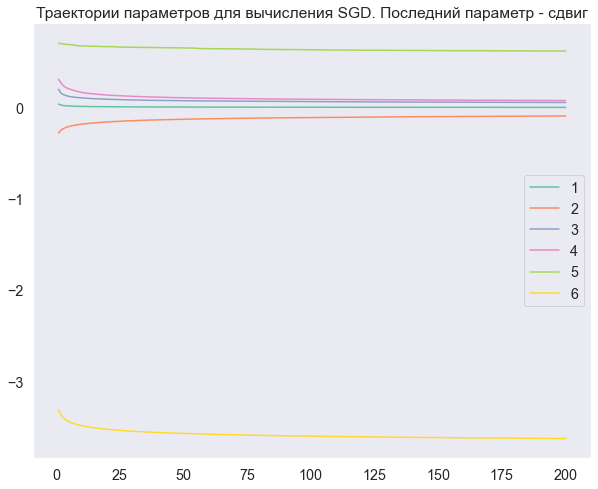

In [44]:
plt.figure(figsize=(10,8))
i = 0

plt.grid()

for param in np.transpose(model_intercept.trajectory):
    i += 1
    plt.plot(np.arange(model_intercept.iter_count) + 1, param, label=i)

plt.title("Траектории параметров для вычисления SGD. Последний параметр - сдвиг")
plt.legend()
plt.show()

Проверим воспроизводимость результатов (запустим еще раз, судя по графику, сотни итераций должно +- хватить). Видим, что результаты воспроизводятся. ура!!

In [45]:
model_intercept =  MyLogisticRegression(fit_intercept = True, iter_count = 100, eta = 1e-5, l=0.5, m=100000)
model_intercept.fit(X_train_std, y_train)
print(np.mean(model_intercept.predict(X_test_std)))
print("Model coefficients: ", model_intercept.coef_, model_intercept.intercept_)

0.0
10.0
20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0
3.508058009247241e-06
Model coefficients:  [-0.01156528 -0.12169141  0.06018578  0.08894197  0.67255794] -3.5996459165240746


In [46]:
print("Относительная ошибка определения среднего для нашей модели со сдвигом, %: ", 100 * np.mean(np.abs(model_intercept.predict(X_test_std)-y_test)  ) / np.mean(y_test))

Относительная ошибка определения среднего для нашей модели со сдвигом, %:  100.01649620587264


Правда, не фитится нихуя. Попробуем добавить веса.

<h4> Использование весов в функции правдоподобия </h4>

In [48]:
model_intercept =  MyLogisticRegression(fit_intercept = True, iter_count = 300, eta = 1e-5, l=0.5, m=10000, weight = 0.5/np.mean(y_train) )
model_intercept.fit(X_train_std, y_train)
print(np.mean(model_intercept.predict(X_test_std)))
print("Model coefficients: ", model_intercept.coef_, model_intercept.intercept_)

0.0
10.0
20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0
0.001091006040875892
Model coefficients:  [-0.00946106  0.09062153 -0.02219505 -0.10623779 -0.41546041] -0.6872200280158525


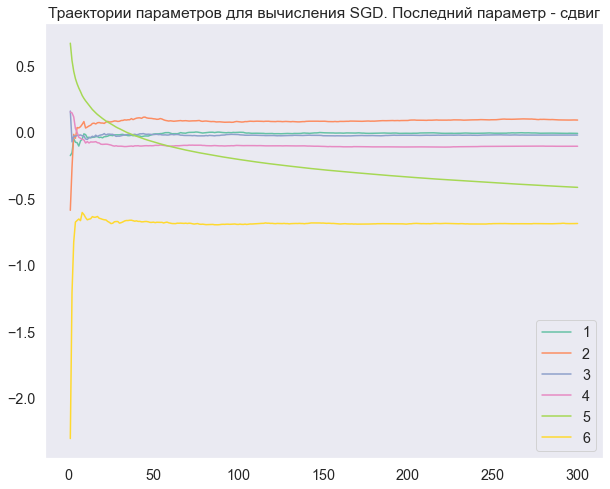

In [49]:
plt.figure(figsize=(10,8))
i = 0

plt.grid()

for param in np.transpose(model_intercept.trajectory):
    i += 1
    plt.plot(np.arange(model_intercept.iter_count) + 1, param, label=i)

plt.title("Траектории параметров для вычисления SGD. Последний параметр - сдвиг")
plt.legend()
plt.show()

Так, ну уже стало получше, но все-таки еще не то. Чуть-чуть не хватает значимости меньшему классу. Можно проверить, что уже с такими весами наша модель оказывается +- настолько же хороша, как и scikit. Попробуем чутка подкрутить (увеличить) вес.

In [50]:
model_intercept =  MyLogisticRegression(fit_intercept = True, iter_count = 100, eta = 1e-5, l=0.5, m=20000, weight = 0.7/np.mean(y_train) )
model_intercept.fit(X_train_std, y_train)
print(np.mean(model_intercept.predict(X_test_std)))
print("Model coefficients: ", model_intercept.coef_, model_intercept.intercept_)

0.0
10.0
20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0
0.009678732047513138
Model coefficients:  [-0.01578775  0.08779439 -0.01669518 -0.12474898 -0.44957688] -0.34797868317410235


Мды. увеличили вес, ошибка тоже увеличилась. построим-ка мы прикидочный график.

[0.1   0.325 0.55  0.775 1.   ]
0.0
10.0
20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0
0.0
10.0
20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0
0.0
10.0
20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0
0.0
10.0
20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0
0.0
10.0
20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0


No handles with labels found to put in legend.


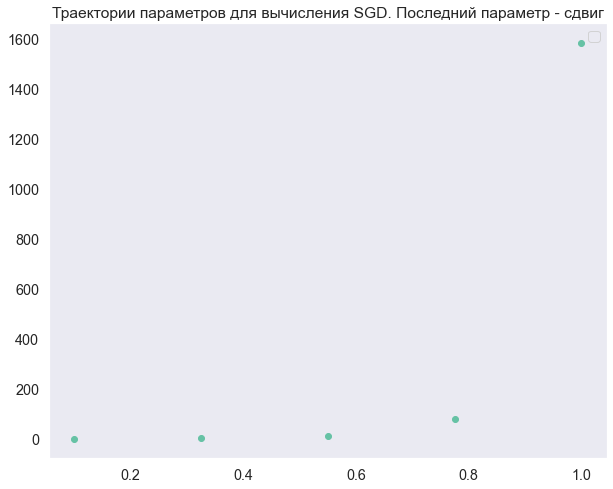

In [51]:
plt.figure(figsize=(10,8))
i = 0

plt.grid()

weights = np.linspace(0.1, 1, 5)
print(weights)
scores = []

for w in weights:
    model_intercept =  MyLogisticRegression(fit_intercept = True, iter_count = 300, eta = 1e-5, l=0.5, m=10000, weight = w/np.mean(y_train) )
    model_intercept.fit(X_train_std, y_train)
    scores.append(100 * np.mean(np.abs(model_intercept.predict(X_test_std)-y_test)  ) / np.mean(y_test) - 100)
    
plt.scatter(weights, np.array(scores))

plt.title("Траектории параметров для вычисления SGD. Последний параметр - сдвиг")
plt.legend()
plt.show()

[0.1  0.15 0.2  0.25 0.3 ]
0.0
10.0
20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0
0.0
10.0
20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0
0.0
10.0
20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0
0.0
10.0
20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0
0.0
10.0
20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0


No handles with labels found to put in legend.


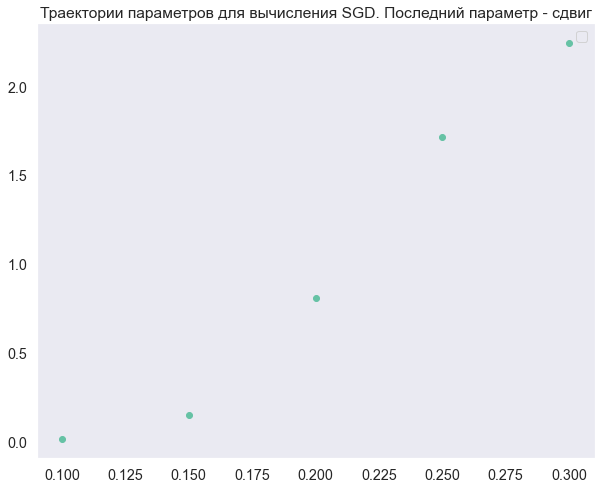

In [52]:
plt.figure(figsize=(10,8))
i = 0

plt.grid()

weights = np.linspace(0.1, 0.3, 5)
print(weights)
scores = []

for w in weights:
    model_intercept =  MyLogisticRegression(fit_intercept = True, iter_count = 300, eta = 1e-5, l=0.5, m=20000, weight = w/np.mean(y_train) )
    model_intercept.fit(X_train_std, y_train)
    scores.append(100 * np.mean(np.abs(model_intercept.predict(X_test_std)-y_test)  ) / np.mean(y_test) - 100)
    
plt.scatter(weights, np.array(scores))

plt.title("Траектории параметров для вычисления SGD. Последний параметр - сдвиг")
plt.legend()
plt.show()

In [53]:
print(scores)

[0.016496205872641667, 0.14846585285383185, 0.8083140877598396, 1.7156054107555292, 2.243483998680304]


Посчитайте ошибку на тестовой выборке.

In [54]:
accuracy_score(y_test, model_intercept.predict(X_test_std))

0.9782570564586855

Из-за неравномерности распределения посмотрим на суммарное распределение среднего, а на отношение один-нормы разности к один-норме истинных значений.

In [55]:
print("Относительная ошибка определения среднего для нашей модели со сдвигом, %: ", 100 * np.mean(np.abs(model_intercept.predict(X_test_std)-y_test)  ) / np.mean(y_test))

Относительная ошибка определения среднего для нашей модели со сдвигом, %:  102.2434839986803


In [88]:
print("Относительная ошибка определения среднего для модели из scikit, %: ",  100 * np.mean(np.abs(clf.predict(X_test_std)-y_test)  ) / np.mean(y_test) )

Относительная ошибка определения среднего для модели из scikit, %:  103.10128670405807


In [89]:
print("Относительная ошибка определения среднего для нашей модели без сдвига, %: ", 100 * np.mean(np.abs(model.predict(X_test_std)-y_test)  ) / np.mean(y_test))

Относительная ошибка определения среднего для нашей модели без сдвига, %:  2279.01682612999


видим, что наша модель со сдвигом дает сопоставимые результаты со стандартной. 
Но работает все равно хуево, что то, что это. как будем решать? Нагереним синтетический датасет. А именно, посчитаем среднее расстояние между точками с признаком 2 и вокруг каждой точки с гауссовой плотностью нагенерим других точек и добавим их в датасет. ну, а что еще делать. либо веса подкручивать в функцию правдоподобия, либо так..

<h3> Синтетическая (до)генерация датасета </h3>

Попробуем теперь улучшить ситуацию, нагенерив рядом с точками класса 1 побольше точек, с нормальным, скажем, распределением. В качестве дисперсии возьмем, например, расстояние до ближайшей точки своего класса.

In [64]:
# выберем нужные значения, которые будем дополнять
# работаем только с тренировочным датасетом, чтобы не переобучиться

i = 0
X1 = []

for el in y_train:
    if el == 1:
        X1.append(X_train_std[i])
        # используем стандартизированный датасет, чтобы не было лишних траблов
    i += 1

# посчитаем расстояние до ближайшего соседа

N = np.shape(X1)[0]
sigmas2 = np.empty(N)
i = 0

print("Calculating distances...")

# пробегаем по массиву и считаем расстояния до ближайшего элемента
for x in X1:
    dists2 = np.sum((x - X1) * (x - X1), axis = 1)
    # отсекаем себя же
    dists2 = np.delete(dists2, i)
    sigmas2[i] = np.min(dists2)
    i += 1

Calculating distances...


In [127]:
print("Generating synthetic dataset...")
    
# собственно, генерим сам синтетический датасет    
l = np.shape(X1)[1]
m = int(1 / np.mean(y) / 4)
print("Going to generate ", m, " synthetic points for every real point.")
# число генерируемых точек для каждого элемента
X1_synt = np.empty( (m * N , l)  )
for i in range(N):
    #print(sps.multivariate_normal(mean = X1[i], cov = np.sqrt(sigmas2[i]) * np.eye(l)).rvs(size = m))
    X1_synt[m * i : m * i + m] = sps.multivariate_normal(mean = X1[i], cov = np.sqrt(sigmas2[i]) * np.eye(l)).rvs(size = m)

Generating synthetic dataset...
Going to generate  11  synthetic points for every real point.


In [128]:
print(X1_synt)

[[-0.28572879  0.11267663 -0.02588766  0.77133817  0.13585535]
 [-0.59138535 -0.11764583 -0.32991065  0.82657007 -0.09324426]
 [-0.35018066  0.13297873 -0.4460613   0.96473387 -0.55268855]
 ...
 [-0.74339286  1.086749   -1.05497139  0.92887383 -0.70406821]
 [-0.71095337  1.57866198 -0.49492774  0.63251064  0.25827924]
 [-0.30092035  1.12455878 -0.9812035   1.07303687  0.01712173]]


Объединяем датасеты!

In [129]:
X_train_synt = np.concatenate( (X_train_std, X1_synt) )
y_train_synt = np.concatenate( (y_train, np.ones(m * N)) )
print(X_train_synt, y_train_synt)
print(np.shape(X_train_synt), np.shape(y_train_synt) )

[[-1.41768965 -0.64400047 -0.65976143 -0.29577993 -0.00750055]
 [-0.23163817 -1.26549676 -0.21224987 -0.04881159 -0.02335104]
 [-0.70990639  0.67303503 -0.28976532  0.40532592 -0.01772766]
 ...
 [-0.74339286  1.086749   -1.05497139  0.92887383 -0.70406821]
 [-0.71095337  1.57866198 -0.49492774  0.63251064  0.25827924]
 [-0.30092035  1.12455878 -0.9812035   1.07303687  0.01712173]] [0. 0. 0. ... 1. 1. 1.]
(817561, 5) (817561,)


Учим модель.

In [130]:
clf_synt = LogisticRegression()
clf_synt.fit(X_train_synt, y_train_synt)
print("Коэффициенты модели: ", clf_synt.coef_, clf_synt.intercept_)
print(np.mean(clf_synt.predict(X_test_std)))
np.mean(clf_synt.predict(X_test_std))

Коэффициенты модели:  [[-0.02760871  0.0816793  -0.02148488 -0.04278893 -4.59634178]] [-1.52886959]
0.0001543545524068786


0.0001543545524068786

In [131]:
print("Относительная ошибка определения среднего для модели из scikit с синтетическим датасетом, %: ",  100 * np.mean(np.abs(clf_synt.predict(X_test_std)-y_test)  ) / np.mean(y_test) )

Относительная ошибка определения среднего для модели из scikit с синтетическим датасетом, %:  100.72583305839656


In [134]:
model_intercept_synt =  MyLogisticRegression(fit_intercept = True, iter_count = 2000, eta = 1e-6, l=1, m=1000)
model_intercept_synt.fit(X_train_synt, y_train_synt)
print(np.mean(model_intercept_synt.predict(X_test_std)))
print("Model coefficients: ", model_intercept_synt.coef_, model_intercept_synt.intercept_)

0.0
10.0
20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0
0.01917504507854542
Model coefficients:  [0.19203257 0.16707066 0.25999679 0.39305485 0.67671398] -0.840051733700633


In [135]:
print("Относительная ошибка определения среднего для нашей модели с синтетическим датасетом, %: ",  100 * np.mean(np.abs(model_intercept_synt.predict(X_test_std)-y_test)  ) / np.mean(y_test) )

Относительная ошибка определения среднего для нашей модели с синтетическим датасетом, %:  190.00329924117455


<h2> Выводы </h2>

Мы перебробовали и веса, и синт датасет, и регуляризацию, и все равно все по пизде. Вывод, имхо, один: ну не очень хорошо линейной плоскостью разделяются классы, селяви. И это качественно подтверждается наблюдениями на графики (сетку из пар признаков). Ну, что поделать, бывает. 

По этому поводу, особого смысла строить больше метрику от шага я не вижу, все равно говно какое-то на выходе. На сим и откланяемся с данным заданием.

<h2> Зависимость от шага итерации </h2>

Начнем с метрики accuracy, пускай она и не очень из-за сильной неоднородности данных. Ну, вернее, с траекторий параметров для заданного вычисления.

In [ ]:
plt.figure(figsize=(10,8))
i = 0

for param in np.transpose(model_intercept.trajectory):
    i += 1
    plt.plot(np.arange(model_intercept.iter_count) + 1, param, label=i)

plt.title("Траектории параметров для вычисления SGD. Последний параметр - сдвиг")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
i = 0

metrics = np.zeros(model_intercept.iter_count) 

for i in range(model_intercept.iter_count):
    n = np.shape(X_test_std)[0]
    coef = model_intercept.trajectory[i][:-1]
    intercept = model_intercept.trajectory[i][-1]
    l = np.sum(np.array([coef * X_test_std[i] for i in range(n)]), axis = 1) + intercept          
    
    metrics[i] = 100 * np.mean(np.abs( (1 + np.sign(l))/2 - y_test)  ) / np.mean(y_test)
    

plt.plot(np.arange(model_intercept.iter_count) + 1, metrics, label=i)

plt.title("Метрика обучения модели")
plt.ylim( (50,250) ) 
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
i = 0

metrics = np.zeros(model_intercept.iter_count) 

for i in range(model_intercept.iter_count):
    n = np.shape(X_test_std)[0]
    coef = model_intercept.trajectory[i][:-1]
    intercept = model_intercept.trajectory[i][-1]
    l = np.sum(np.array([coef * X_test_std[i] for i in range(n)]), axis = 1) + intercept          
    
    metrics[i] = 100 * np.mean(np.abs( (1 + np.sign(l))/2 - y_test)  ) / np.mean(y_test)
    

plt.plot(np.arange(model_intercept.iter_count) + 1, metrics, label=i)

plt.title("Метрика обучения модели")
plt.ylim( (50,250) ) 
plt.legend()
plt.show()

В общем, всрато работает регрессия. Все дело в большой неравномерности выборки. идея: нагенерим внутри выпуклой оболочки точек с единичным признаком еще точек, чтобы соотношение точек двух классов стало +- равным

Также необходимо брать число шагов в подвыборке больше. видимо, придется даже брать всю выборку. ну или какую-то ощутимую часть. Поэтому, положим m=2e15.

И в нашей постановке задачи замена веса = умножение столбца признаков на вес (нули не поменяются, а единички, которых сильно меньше, начнут давать адекватный вклад). Наша цель - подобрать вес так, чтобы вклады от обоих классов были примерно одинаковыми.. поэтому умножим на отношение количеств элементов при тренировке модели.

In [ ]:
weight = np.size(y_train) / np.sum (y_train)

model_intercept =  MyLogisticRegression(fit_intercept = True, iter_count = 1000, 
                                        eta = 1e-7, l = 0.5, m = 20000, weight = weight)
model_intercept.fit(X_train_std, y_train)
print(np.mean(model_intercept.predict(X_test_std)))
print("Model coefficients: ", model_intercept.coef_, model_intercept.intercept_)

Учитывая, правда, необходимость выбирать большое m, видимо, рациональнее было бы нагеренить синтетическую выборку из класса 1, тогда скорость расчетов ощутимо увеличится.

In [ ]:
plt.figure(figsize=(10,8))
i = 0

for param in np.transpose(model_intercept.trajectory):
    i += 1
    plt.plot(np.arange(model_intercept.iter_count) + 1, param, label=i)

plt.title("Траектории параметров для вычисления SGD. Последний параметр - сдвиг")
plt.legend()
plt.show()

In [ ]:
print("Относительная ошибка определения среднего для нашей модели со сдвигом, %: ", 100 * np.mean(np.abs(model_intercept.predict(X_test_std) - y_test)  ) / np.mean(y_test))

In [ ]:
model_intercept.predict(X_test_std)

In [ ]:
plt.figure(figsize=(10,8))
i = 0

metrics = np.zeros(model_intercept.iter_count) 

for i in range(model_intercept.iter_count):
    n = np.shape(X_test_std)[0]
    coef = model_intercept.trajectory[i][:-1]
    intercept = model_intercept.trajectory[i][-1]
    l = np.sum(np.array([coef * X_test_std[i] for i in range(n)]), axis = 1) + intercept          
    
    metrics[i] = 100 * np.mean(np.abs( (1 + np.sign(l))/2 - y_test)  ) / np.mean(y_test)
    

plt.plot(np.arange(model_intercept.iter_count) + 1, metrics, label=i)

plt.title("Траектории параметров для вычисления SGD. Последний параметр - сдвиг")
plt.legend()
plt.show()

Сделайте выводы.